Copyright @ cb_park@korea.ac.kr (Cheonbok Park), joonleesky@kaist.ac.kr (Hojoon Lee)

## Convolutional Neural Network

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as datasets
import torchvision.transforms as transforms

## Below are the all identical neural network with different expression

In [ ]:
class CNN1(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN1, self).__init__()
        
        self.conv = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2)

    def forward(self, x):
        out = self.conv(x)
        out = self.relu(out)
        out = self.maxpool(out)
        return out  # input image = batch_size x 3 x 16 x 16

    
class CNN2(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN2, self).__init__()

        self.layer = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16      
      

class CNN3(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN3, self).__init__()
        layer = []
        
        layer.append(nn.Conv2d(3, 64, kernel_size=3, padding=1))
        layer.append(nn.ReLU())
        layer.append(nn.MaxPool2d(2))
        
        self.layer = nn.Sequential(*layer)

    def forward(self, x):
        out = self.layer(x)
        return out  # input image = batch_size x 3 x 16 x 16

In [ ]:
sample_image = Variable(torch.zeros(64, 3, 32, 32))

In [ ]:
cnn = CNN1()
print(cnn)
output = cnn(sample_image)
print(output.size())

In [ ]:
cnn = CNN2()
print(cnn)
output = cnn(sample_image)
print(output.size())

In [ ]:
cnn = CNN3()
print(cnn)
output = cnn(sample_image)
print(output.size())

### Let's practice creating the Convolutional Neural Network

In [40]:
class CNN_prac(nn.Module):
    def __init__(self): # input image = batch_size x 3 x 32 x 32
        super(CNN_prac, self).__init__()
        self.conv1 = nn.Conv2d(3, 512, 3, 1, 1) 
        self.conv2 = nn.Conv2d(512, 256, 3, 1, 1) 
        self.conv3 = nn.Conv2d(256, 256, 3, 2, 1) 
        self.conv4 = nn.Conv2d(256, 256, 3, 4, 0) 

        self.linear = nn.Linear(256*4*4, 10)
    def forward(self, x):
        out=self.conv1(x)
        out=self.conv2(out)
        out=self.conv3(out)
        out=self.conv4(out)
        out = out.contiguous().view(-1, 256*4*4)
        out = self.linear(out)
        return out

In [41]:
cnn_prac=CNN_prac()
sample_image = Variable(torch.zeros(64, 3, 32, 32))
output=cnn_prac(sample_image)
print(output.size()) 
print(cnn_prac)

torch.Size([64, 10])
CNN_prac(
  (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(4, 4))
  (linear): Linear(in_features=4096, out_features=10, bias=True)
)


## VGG-19

### Let's create by yourself

In [2]:
class ConvBlock1(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock1, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2),
                                 )
        
    def forward(self, x):
        out = self.main(x)
        return out

In [3]:
class ConvBlock2(nn.Module):

    def __init__(self, in_dim, out_dim):
        super(ConvBlock2, self).__init__()
        
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.main = nn.Sequential(nn.Conv2d(self.in_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.Conv2d(self.out_dim, self.out_dim, kernel_size=3, padding=1),                    
                                  nn.BatchNorm2d(self.out_dim),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2),
                                 )
        
    def forward(self, x):
        out = self.main(x)
        return out

In [4]:
class VGG19(nn.Module):
  
    def __init__(self):
        super(VGG19, self).__init__()
        
        self.convlayer1 = ConvBlock1(3, 64)
        self.convlayer2 = ConvBlock1(64, 128)
        self.convlayer3 = ConvBlock2(128, 256)
        self.convlayer4 = ConvBlock2(256, 512)
        self.convlayer5 = ConvBlock2(512, 512)
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, input):
        out = self.convlayer1(input)    
        out = self.convlayer2(out)
        out = self.convlayer3(out)
        out = self.convlayer4(out)
        out = self.convlayer5(out).squeeze() # 16 x 512 x 1 x 1에서 뒤 1 x 1 축약 
        out = self.linear(out)
        return out


## Test Your Impelemetation by number of parameters

In [44]:
vgg19 = VGG19()
print(vgg19)

output = vgg19(sample_image)
print(output.size())

VGG19(
  (convlayer1): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (convlayer2): ConvBlock1(
    (main): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2,

In [45]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
if count_parameters(vgg19) == 20365002:
    print('success!')

success!


# CIFAR-10 Dataset

50000 training images  \
10000 validation images \
\
10 classes = [airplane, car, truck, frog, ...]
\
for more info, https://www.cs.toronto.edu/~kriz/cifar.html 



In [5]:
# set hyperparameters
batch_size = 64
learning_rate = 0.0001
num_epochs = 4

In [6]:
# import torchvision.datasets as datasets

train_dataset = datasets.CIFAR10(root='./data/',       # 50000장
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = datasets.CIFAR10(root='./data/',        # 10000장
                           train=False, 
                           transform=transforms.ToTensor())

# 데이터 로더
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=True)

Files already downloaded and verified


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


def show_cifar10():
    for images, _ in train_loader:
        plt.figure(figsize=(8,8))
        images_to_show = images.numpy().transpose((0,2,3,1))

        for a in range(331, 340):  
            plt.subplot(a)
            plt.imshow(images_to_show[a-331])
            plt.xticks([])
            plt.yticks([])    
            plt.show()   
        break
    return 0


def loss_plot(acc):  
    plt.plot(acc)
    plt.xlabel('log')
    plt.ylabel('accuracy')
    plt.grid(True)
    plt.show()
    return 0

import time
class Timer():    
    def __init__(self):
        self.cur_t = time.time()

    def tic(self):
        self.cur_t = time.time()

    def toc(self):
        return time.time() - self.cur_t

    def tocStr(self, t=-1):
        if (t == -1):
            return str(datetime.timedelta(seconds=np.round(time.time() - self.cur_t, 3)))[:-4]
        else:
            return str(datetime.timedelta(seconds=np.round(t, 3)))[:-4]
          

def test_on_cifar10(model, accuracy_list):  
    # Test the Model       
    model.eval()    # Change model to 'eval' mode (BN uses moving mean/var).
    correct = 0
    total = 0
    for j, (images, labels) in enumerate(test_loader):
        images = Variable(images).cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum().data
        if (j+1)%100==0:
            break
    print('Test Accuracy of the model on the 100 test images: %d %%' % (100 * int(correct) / int(total)))
    accuracy_list.append(100 * int(correct) / int(total))
#     print('Test Accuracy of the model on the 100 test images: %d %%' % (100 * torch.true_divide(correct, total)))
#     accuracy_list.append(100 * torch.true_divide(correct, total)) 
    return accuracy_list


def conf_on_cifar10(model):        
    model.eval()    # Change model to 'eval' mode (BN uses moving mean/var).
    correct = 0
    total = 0

    # Data for confusion matrix
    conf_true = torch.zeros(0, dtype=torch.long, device='cpu')
    conf_pred = torch.zeros(0, dtype=torch.long, device='cpu')

    for j, (images, labels) in enumerate(test_loader):
        images = Variable(images).cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Append batch prediction results for confusion matrix
        conf_true = torch.cat([conf_true, labels.view(-1).cpu()])
        conf_pred = torch.cat([conf_pred, predicted.view(-1).cpu()])


    label_name = ['air', 'auto', 'bird', 'cat', 'deer', 'dog',
                  'frog', 'horse', 'ship', 'truck']
    conf_mat = confusion_matrix(conf_true.numpy(), conf_pred.numpy(), labels=[i for i in range(10)])
    print('\nConfusion matrix\n')
    print(conf_mat)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(10):
            for j in range(10):
                texts = ax.text(j, i, conf_mat[i, j], ha="center", va="center", color="w")
    cax = ax.matshow(conf_mat)
    fig.colorbar(cax)
    ax.set_xticks([i for i in range(10)])
    ax.set_yticks([i for i in range(10)])
    ax.set_xticklabels(label_name)
    ax.set_yticklabels(label_name)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

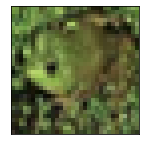

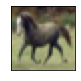

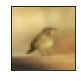

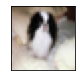

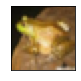

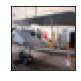

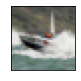

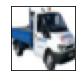

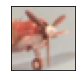

0

In [30]:
show_cifar10()

## Train Cifar-10 with your VGG-19

Epoch [1/4], Iter [100/781] Loss: 1.6203, iter_time: 2.72
Test Accuracy of the model on the 100 test images: 31 %
Epoch [1/4], Iter [200/781] Loss: 1.6918, iter_time: 3.72
Test Accuracy of the model on the 100 test images: 32 %
Epoch [1/4], Iter [300/781] Loss: 1.6966, iter_time: 3.71
Test Accuracy of the model on the 100 test images: 39 %
Epoch [1/4], Iter [400/781] Loss: 1.5009, iter_time: 3.74
Test Accuracy of the model on the 100 test images: 44 %
Epoch [1/4], Iter [500/781] Loss: 1.3751, iter_time: 3.85
Test Accuracy of the model on the 100 test images: 48 %
Epoch [1/4], Iter [600/781] Loss: 1.1494, iter_time: 3.90
Test Accuracy of the model on the 100 test images: 48 %
Epoch [1/4], Iter [700/781] Loss: 1.5847, iter_time: 3.75
Test Accuracy of the model on the 100 test images: 52 %


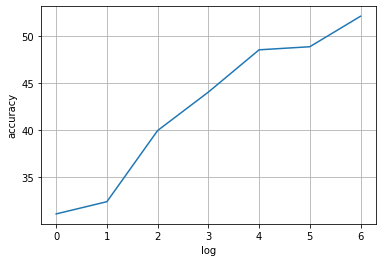

Epoch [2/4], Iter [100/781] Loss: 1.3746, iter_time: 6.39
Test Accuracy of the model on the 100 test images: 56 %
Epoch [2/4], Iter [200/781] Loss: 1.2293, iter_time: 3.76
Test Accuracy of the model on the 100 test images: 54 %
Epoch [2/4], Iter [300/781] Loss: 1.2927, iter_time: 4.00
Test Accuracy of the model on the 100 test images: 57 %
Epoch [2/4], Iter [400/781] Loss: 1.1932, iter_time: 4.10
Test Accuracy of the model on the 100 test images: 59 %
Epoch [2/4], Iter [500/781] Loss: 1.1130, iter_time: 3.87
Test Accuracy of the model on the 100 test images: 58 %
Epoch [2/4], Iter [600/781] Loss: 1.1487, iter_time: 3.75
Test Accuracy of the model on the 100 test images: 61 %
Epoch [2/4], Iter [700/781] Loss: 1.4557, iter_time: 3.74
Test Accuracy of the model on the 100 test images: 60 %


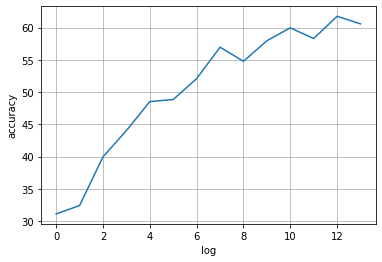

Epoch [3/4], Iter [100/781] Loss: 1.0688, iter_time: 5.92
Test Accuracy of the model on the 100 test images: 65 %
Epoch [3/4], Iter [200/781] Loss: 0.8717, iter_time: 3.72
Test Accuracy of the model on the 100 test images: 62 %
Epoch [3/4], Iter [300/781] Loss: 0.9699, iter_time: 4.03
Test Accuracy of the model on the 100 test images: 65 %
Epoch [3/4], Iter [400/781] Loss: 1.1344, iter_time: 3.83
Test Accuracy of the model on the 100 test images: 64 %
Epoch [3/4], Iter [500/781] Loss: 0.8229, iter_time: 3.84
Test Accuracy of the model on the 100 test images: 65 %
Epoch [3/4], Iter [600/781] Loss: 1.0035, iter_time: 3.77
Test Accuracy of the model on the 100 test images: 67 %
Epoch [3/4], Iter [700/781] Loss: 0.8915, iter_time: 3.76
Test Accuracy of the model on the 100 test images: 68 %


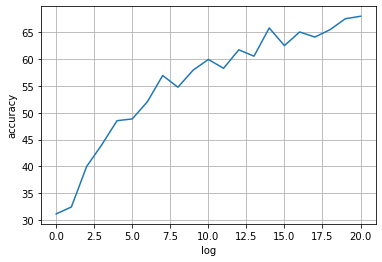

Epoch [4/4], Iter [100/781] Loss: 0.8074, iter_time: 5.98
Test Accuracy of the model on the 100 test images: 71 %
Epoch [4/4], Iter [200/781] Loss: 0.7505, iter_time: 3.78
Test Accuracy of the model on the 100 test images: 66 %
Epoch [4/4], Iter [300/781] Loss: 0.6841, iter_time: 3.77
Test Accuracy of the model on the 100 test images: 71 %
Epoch [4/4], Iter [400/781] Loss: 0.8854, iter_time: 3.96
Test Accuracy of the model on the 100 test images: 68 %
Epoch [4/4], Iter [500/781] Loss: 1.1934, iter_time: 3.78
Test Accuracy of the model on the 100 test images: 67 %
Epoch [4/4], Iter [600/781] Loss: 0.7164, iter_time: 3.79
Test Accuracy of the model on the 100 test images: 70 %
Epoch [4/4], Iter [700/781] Loss: 0.5286, iter_time: 3.84
Test Accuracy of the model on the 100 test images: 72 %


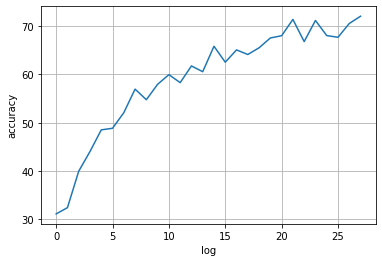


Confusion matrix

[[746   5 125  20  23   2   7   9  18  45]
 [ 11 804   5   8   2   0   9   1  12 148]
 [ 48   1 700  52  85  40  59  10   0   5]
 [ 10   5 119 491  83 163  99  16   4  10]
 [ 11   3 130  31 711  18  47  45   3   1]
 [  6   1 107 230  61 545  17  28   0   5]
 [  3   1  55  48  51   3 832   0   0   7]
 [  5   3  66  42  85  60   7 723   2   7]
 [149  31  34  35   5   2  13   0 685  46]
 [ 37  32   8  18  11   1  12  17   5 859]]


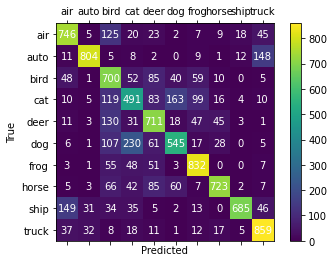

In [47]:
import torchvision.models as models
# vgg19 = models.vgg19_bn(pretrained=False)

tell_time = Timer()
iter_time = 0

# vgg19 = vgg19.cuda()
vgg19 = VGG19().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, int(len(train_dataset))//float(batch_size), loss.item(), tell_time.toc()-iter_time))
#                 %(epoch+1, num_epochs, i+1, torch.floor_divide(len(train_dataset), batch_size), loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(vgg19, accuracy_list)

    loss_plot(accuracy_list)
    
conf_on_cifar10(vgg19)

## Train Cifar-10 with pre-trained VGG-19

In [48]:
import torchvision.models as models
pre_vgg=models.vgg19_bn(pretrained=True)

In [49]:
class pretrained_vgg(nn.Module):
    def __init__(self, pre_vgg):
        super(pretrained_vgg, self).__init__()
        self.features = nn.Sequential(   
            *list(pre_vgg.features.children())
        )
        self.linear = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
        )
    def forward(self, x):
        out = self.features(x).squeeze()
        out = self.linear(out)
        return out

Epoch [1/4], Iter [100/781] Loss: 1.2127, iter_time: 2.62
Test Accuracy of the model on the 100 test images: 64 %
Epoch [1/4], Iter [200/781] Loss: 0.8220, iter_time: 3.84
Test Accuracy of the model on the 100 test images: 75 %
Epoch [1/4], Iter [300/781] Loss: 0.6206, iter_time: 3.73
Test Accuracy of the model on the 100 test images: 78 %
Epoch [1/4], Iter [400/781] Loss: 0.6940, iter_time: 3.72
Test Accuracy of the model on the 100 test images: 80 %
Epoch [1/4], Iter [500/781] Loss: 0.5529, iter_time: 3.71
Test Accuracy of the model on the 100 test images: 80 %
Epoch [1/4], Iter [600/781] Loss: 0.7483, iter_time: 3.73
Test Accuracy of the model on the 100 test images: 81 %
Epoch [1/4], Iter [700/781] Loss: 0.5243, iter_time: 3.77
Test Accuracy of the model on the 100 test images: 83 %


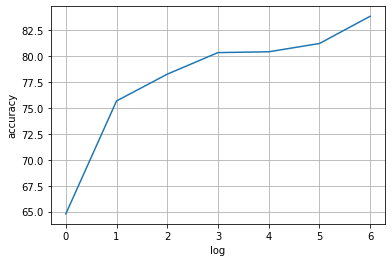

Epoch [2/4], Iter [100/781] Loss: 0.3482, iter_time: 5.90
Test Accuracy of the model on the 100 test images: 86 %
Epoch [2/4], Iter [200/781] Loss: 0.4360, iter_time: 3.72
Test Accuracy of the model on the 100 test images: 84 %
Epoch [2/4], Iter [300/781] Loss: 0.6396, iter_time: 3.87
Test Accuracy of the model on the 100 test images: 84 %
Epoch [2/4], Iter [400/781] Loss: 0.1220, iter_time: 3.83
Test Accuracy of the model on the 100 test images: 84 %
Epoch [2/4], Iter [500/781] Loss: 0.6703, iter_time: 3.74
Test Accuracy of the model on the 100 test images: 85 %
Epoch [2/4], Iter [600/781] Loss: 0.3549, iter_time: 3.73
Test Accuracy of the model on the 100 test images: 86 %
Epoch [2/4], Iter [700/781] Loss: 0.4010, iter_time: 3.72
Test Accuracy of the model on the 100 test images: 85 %


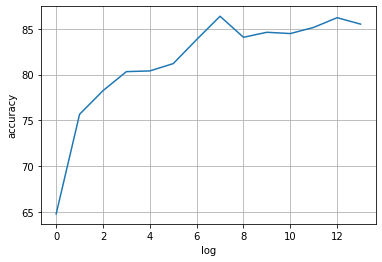

Epoch [3/4], Iter [100/781] Loss: 0.1688, iter_time: 5.92
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [200/781] Loss: 0.3826, iter_time: 3.73
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [300/781] Loss: 0.1340, iter_time: 3.83
Test Accuracy of the model on the 100 test images: 86 %
Epoch [3/4], Iter [400/781] Loss: 0.1320, iter_time: 3.74
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [500/781] Loss: 0.3863, iter_time: 3.74
Test Accuracy of the model on the 100 test images: 82 %
Epoch [3/4], Iter [600/781] Loss: 0.1979, iter_time: 3.74
Test Accuracy of the model on the 100 test images: 87 %
Epoch [3/4], Iter [700/781] Loss: 0.1827, iter_time: 3.80
Test Accuracy of the model on the 100 test images: 87 %


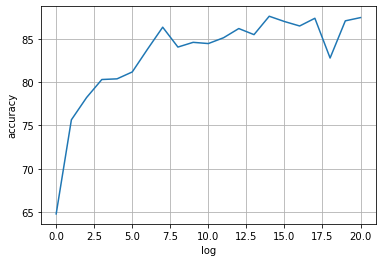

Epoch [4/4], Iter [100/781] Loss: 0.3115, iter_time: 6.12
Test Accuracy of the model on the 100 test images: 88 %
Epoch [4/4], Iter [200/781] Loss: 0.2527, iter_time: 3.98
Test Accuracy of the model on the 100 test images: 84 %
Epoch [4/4], Iter [300/781] Loss: 0.0746, iter_time: 3.89
Test Accuracy of the model on the 100 test images: 87 %
Epoch [4/4], Iter [400/781] Loss: 0.1299, iter_time: 3.80
Test Accuracy of the model on the 100 test images: 87 %
Epoch [4/4], Iter [500/781] Loss: 0.2680, iter_time: 3.81
Test Accuracy of the model on the 100 test images: 87 %
Epoch [4/4], Iter [600/781] Loss: 0.2233, iter_time: 4.14
Test Accuracy of the model on the 100 test images: 88 %
Epoch [4/4], Iter [700/781] Loss: 0.2132, iter_time: 4.00
Test Accuracy of the model on the 100 test images: 87 %


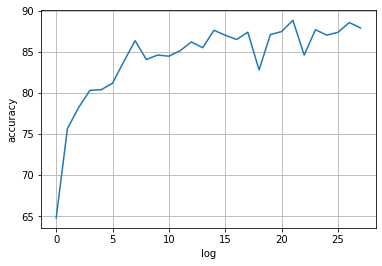


Confusion matrix

[[905   4  15  11   5   4   4   6  39   7]
 [  8 955   1   6   0   1   1   1   7  20]
 [ 19   1 836  30  46  22  31  10   5   0]
 [  4   2  27 760  41  97  32  17   9  11]
 [  6   1  20  14 919   8  14  14   3   1]
 [  3   0  15 117  35 795   9  24   0   2]
 [  5   1  14  38  13   5 918   1   3   2]
 [  4   0   6  13  22  21   0 931   2   1]
 [ 25   7   0   7   3   1   0   1 950   6]
 [ 10  56   0   4   0   0   0   3  17 910]]


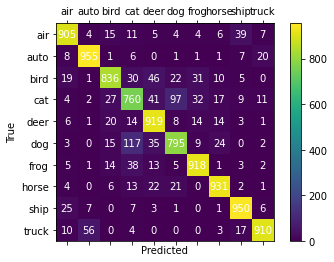

In [50]:
vgg19 = pretrained_vgg(pre_vgg)

tell_time = Timer()
iter_time = 0

vgg19 = vgg19.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(vgg19.parameters(), lr=learning_rate)

accuracy_list = []
for epoch in range(num_epochs):
    vgg19.train()
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = vgg19(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f, iter_time: %2.2f' 
                 %(epoch+1, num_epochs, i+1, int(len(train_dataset))//float(batch_size), loss.item(), tell_time.toc()-iter_time))
#                  %(epoch+1, num_epochs, i+1, torch.floor_divide(len(train_dataset),batch_size), loss.item(), tell_time.toc()-iter_time))
            iter_time = tell_time.toc()    
            accuracy_list = test_on_cifar10(vgg19, accuracy_list)

    loss_plot(accuracy_list)
    
conf_on_cifar10(vgg19)